In [255]:
import numpy as np
import matplotlib.pyplot as plt
import pyswarms as ps
from pyswarms.utils.functions.single_obj import ackley
from mealpy import GWO, FloatVar
import time

# Ackley function

In [256]:
# Definicja funkcji Ackley
def ackley_fun(x, y, a=20, b=0.2, c=2 * np.pi):
    term1 = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    term2 = -np.exp(0.5 * (np.cos(c * x) + np.cos(c * y)))
    return term1 + term2 + a + np.exp(1)



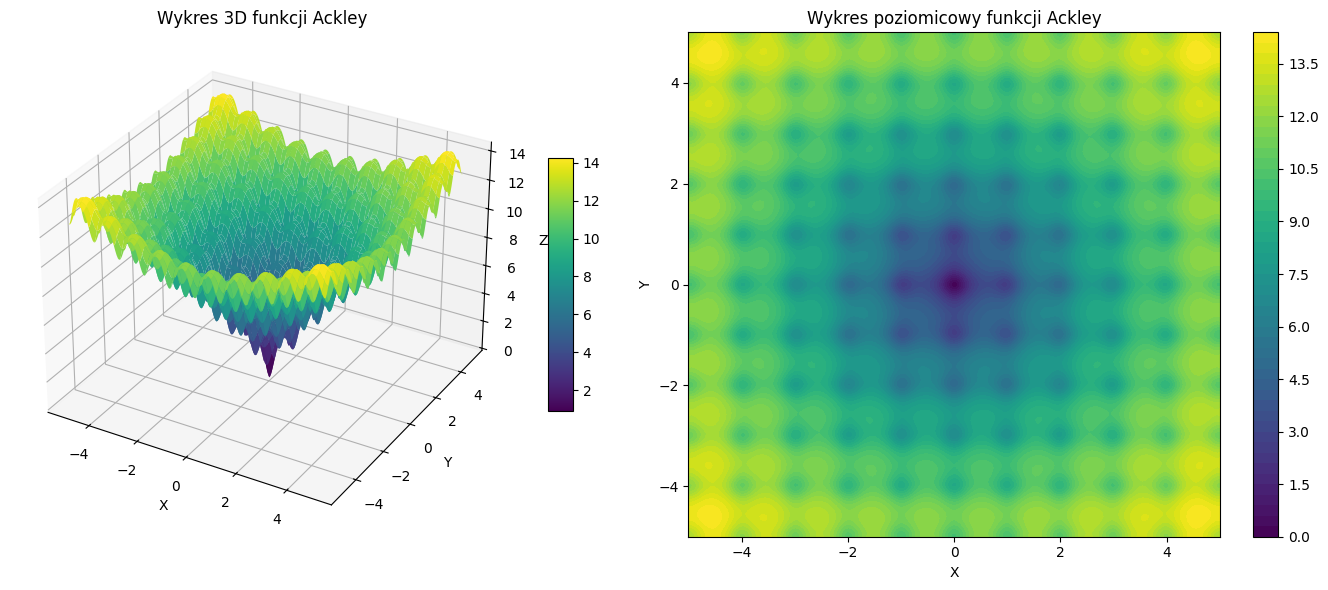

In [257]:
# Zakres wartości x i y
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = ackley(np.array([X, Y]).reshape(2, -1).T).reshape(200, 200)

# Wykres 3D
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax1.set_title('Wykres 3D funkcji Ackley')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

# Wykres poziomicowy
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
ax2.set_title('Wykres poziomicowy funkcji Ackley')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
fig.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()

# PSO

In [258]:


bounds = (np.array([-5, -5]), np.array([5, 5]))
options = {'c1': 1.5, 'c2': 1.5, 'w': 0.5, 'k': 30, 'p': 2}


best_costs = []
elapsed_times = []

for _ in range(5):
    # Utworzenie optymalizatora
    optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=2, options=options, bounds=bounds)

    start_time = time.time()
    # Optymalizacja
    best_cost, best_position = optimizer.optimize(ackley, iters=150)
    end_time = time.time()
    elapsed_time = end_time - start_time

    best_costs.append(best_cost)
    elapsed_times.append(elapsed_time)

avg_cost = np.mean(best_costs)
avg_time = np.mean(elapsed_times)

print(f"Avg global minimum: {avg_cost:.6}")
print(f"Avg time: {avg_time:.6f} ")

2025-01-25 14:13:01,145 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5, 'k': 30, 'p': 2}
pyswarms.single.global_best: 100%|██████████|150/150, best_cost=4.44e-16
2025-01-25 14:13:01,327 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.440892098500626e-16, best pos: [1.23257897e-16 2.47811132e-16]
2025-01-25 14:13:01,334 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5, 'k': 30, 'p': 2}
pyswarms.single.global_best: 100%|██████████|150/150, best_cost=4.44e-16
2025-01-25 14:13:01,421 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.440892098500626e-16, best pos: [-1.20945157e-16 -1.87693597e-16]
2025-01-25 14:13:01,426 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5, 'k': 30, 'p': 2}
pyswarms.single.global_best: 100%|██████████|150/150, best_cost=4.44e-16
2025-01-25 14:13:01,524 - pysw

Avg global minimum: 4.44089e-16
Avg time: 0.131285 


# GWO

In [259]:
def ackley_gwo(solution):
    return ackley(np.array(solution).reshape(1, -1))[0]


problem = {
     "bounds": FloatVar(lb=[-5, -5], ub=[5, 5]),
     "minmax": "min",
     "obj_func": ackley_gwo
}

best_costs = []
elapsed_times = []

for _ in range(10):
    # Parametry algorytmu GWO
    gwo_model = GWO.OriginalGWO(epoch=100, pop_size=20)
    
    # Optymalizacja
    start_time = time.time()
    
    g_best = gwo_model.solve(problem)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    (best_costs.append(g_best.target.fitness))
    elapsed_times.append(elapsed_time)

avg_cost = np.mean(best_costs)
avg_time = np.mean(elapsed_times)

print(f"Avg global minimum: {avg_cost:.6}")
print(f"Avg time: {avg_time:.6f} ")
# print(f"Solution: {gwo_model.g_best.solution}, Fitness: {gwo_model.g_best.target.fitness}")

2025-01-25 14:13:01,834 - mealpy.swarm_based.GWO.OriginalGWO - INFO - Solving single objective optimization problem.
2025-01-25 14:13:01,842 - mealpy.swarm_based.GWO.OriginalGWO - INFO - >>>Problem: P, Epoch: 1, Current best: 0.9415522456071312, Global best: 0.9415522456071312, Runtime: 0.00368 seconds
2025-01-25 14:13:01,847 - mealpy.swarm_based.GWO.OriginalGWO - INFO - >>>Problem: P, Epoch: 2, Current best: 0.9415522456071312, Global best: 0.9415522456071312, Runtime: 0.00355 seconds
2025-01-25 14:13:01,851 - mealpy.swarm_based.GWO.OriginalGWO - INFO - >>>Problem: P, Epoch: 3, Current best: 0.6767159403037444, Global best: 0.6767159403037444, Runtime: 0.00287 seconds
2025-01-25 14:13:01,854 - mealpy.swarm_based.GWO.OriginalGWO - INFO - >>>Problem: P, Epoch: 4, Current best: 0.02391353248622652, Global best: 0.02391353248622652, Runtime: 0.00274 seconds
2025-01-25 14:13:01,858 - mealpy.swarm_based.GWO.OriginalGWO - INFO - >>>Problem: P, Epoch: 5, Current best: 0.02391353248622652, Glo

Avg global minimum: 1.15463e-15
Avg time: 0.374429 
